# Batch Gradient

Recall when computing the gradient descent, the weights are updated as:
<img src="https://drive.google.com/uc?id=1G9ofcSVT6atvqLvEznEa2TIKHpDeCcbD" >


problems with Gradient Descent???

<img src="https://drive.google.com/uc?id=1u2-vOQ1f2hqXOYDryBM_1FbUAMYpdf_r">

<img src ="https://drive.google.com/uc?id=1bQ0TYtwVGLLmi5WfNHWK0c4YbS4VhKvX">

## Mini Batch

Is there a way to reduce the time taken by Batch Gradient ?

<img src="https://drive.google.com/uc?id=1vcSgaTUPL-xGxmWB3IXwaA51XfwBtLpL">

Possible values of K??
<img src="https://drive.google.com/uc?id=1WCrYMPmABcoeoWK4gB9d_nCUtPZb9rIu">



<center><img src='https://drive.google.com/uc?id=1QJCMtx-mZpE070ZejPzmzLejWzCPNvTB' ></center>




Lets understand the fluctuations in weight values with a contour plot of loss:



<center><img src='https://drive.google.com/uc?id=1Lr2UYCgllDmMxd_GcxlfWGDlYskC8--N' ></center>







<center><img src='https://drive.google.com/uc?id=1AtHFA2gA78Sr8Sfn2EiS4kKszS8fpBc_' ></center>





**Observe**

1. For **Batch Gradient descent**,
- Since the entire data is taken for gradients,
    - the weight reaches optimal value with **least number of fluctuations per iteration**

- But due to taking **whole data per iteration**, the time to compute one GD step/iteration  is very high

<br>

2. For **Stochastic GD**,
- Since only a single datapoint is used for  gradients, and these datapoints can be noises in the data
- Hence, there  will be **the maximum number of fluctuations in the weight value**



<br>

3. Now when **Mini-Batch GD** is used:
-  Since it vectorizes the data into chunks, **Mini-Batch GD reaches optimal weight value the fastest**
- With a cose of **few fluctuations in the weight value**









#**Polynomial Regression**

<img src="https://drive.google.com/uc?id=1-EE0T9mp59aHF1nluzKdFrD0FBB4MknH">

Lets consider another dummy data

- Here, we have 50 datapoints
- But now the data is non-linear in nature

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

0.9345996128366808


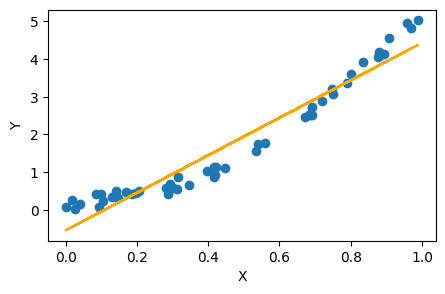

In [ ]:

from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X, y)

output = model.predict(X)

print(model.score(X,y))

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



**observe**

As Linear Regression did not fit the data well

- Concluding that **Linear Regression is not the most suitable model to be used**

## **Explaining Polynomial Regression theoretically**

#### How to make Linear Regression,  Quadratic ?

By adding a new feature $f_2 = f_1^2$, such that:

- $\hat{y^{(i)}} = w_0 + w_1 f_1 + w_2 {f_1}^2$

**Note:** Due to addition of a higher degree($>1$) for a feature,
- we call this model as **Polynomial Regression**


<br>

#### Do we need a separate implementation for Polynomial Regression?

Ans: No, we just need to add a new data column $f_2 = f_1^2$



<center><img src='https://drive.google.com/uc?id=1yZNNXymQXSG9v8L5n6V6xMrOURzV14bx' width=800></center>




**observe**

For the Polynomial Regression equation $\hat{y^{(i)}} = w_0 + w_1f_1 + w_2 f_1^2$
- it is still a linear combination of weights since the degree of weights are 1

<br>

**Concluding** that if we were to **plot the learnt hyperplane** of Polynomial Regression for $f_1$ and $f_2=f_1^2$
- The hyperplane **will be linear**

#### Does using $f_2 = {f_1}^2$ causes MultiCollinearity ?






<center><img src='https://drive.google.com/uc?id=13gfP9hqTnGybTIx_sQc4CAdAm8NpvN3o' width=800></center>






# **Polynomial Regression Code**



 Creating polynomial reg with $X^2$ feature added


In [ ]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

Adj. R-square: 0.9947910474710182


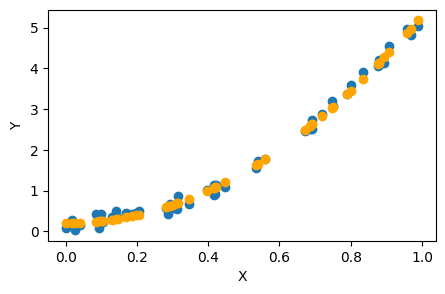

In [ ]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)


print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


**observe**
- The performance of the model increased drastically
- Meaning that a non-linear feature did the trick





#### But are we sure that degree=2 will be best? What about higher degrees?

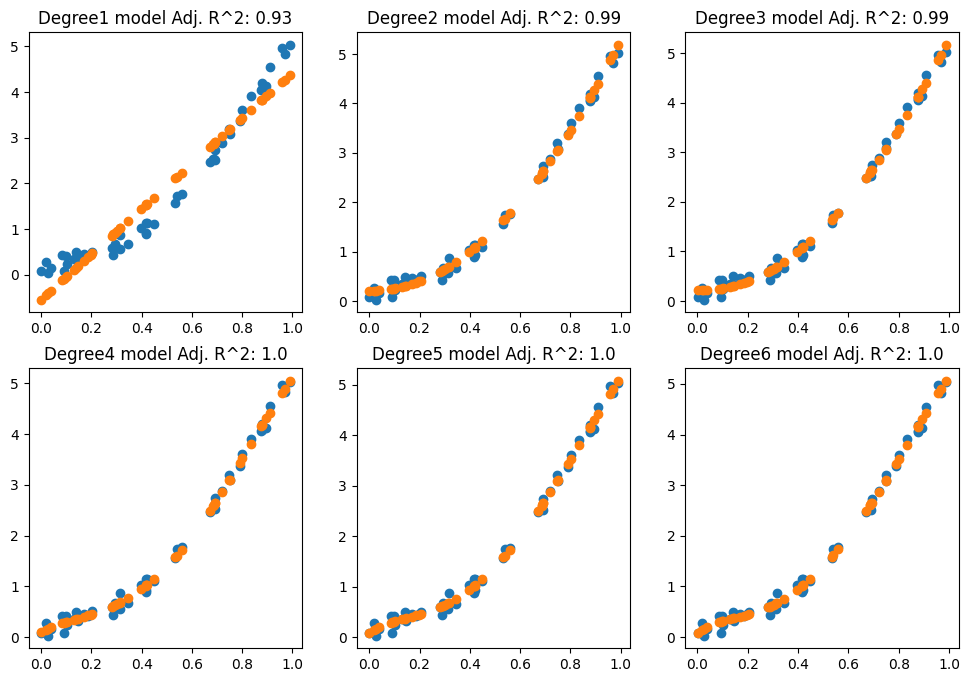

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 6, and seeing performance of the model

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
j = 0
for i in range(1, 7):

    #creates polynomial feature
    poly = PolynomialFeatures(i)

    X_poly = poly.fit_transform(X)
    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting

    axes[j,(i-1)%3].scatter(X, y, label="samples")
    axes[j,(i-1)%3].scatter(X, output, label="prediction")
    axes[j,(i-1)%3].set_title(f'Degree{i} model Adj. R^2: {round(adj_r(r2_score(y,output),X_poly_scaled,y ),2)}')

    if(i==3):
      j=1

**Observe**:
- As the degree of the feature being added increases, the model performance gets better

<br>







# Over fitting

<img src= "https://drive.google.com/uc?id=1ftOPKiOfm6xKpUYCmwJTPxNx2i37EEE4">

This  mean

- Polynomial Regression with high degree do not perform well

Reason:
- high degree models become very complex
- they may learn noise instead of meaningful patterns

This is called as Overfitting --> usually when training performance is really good but testing performance is bad.

## Underfitting

<img src="https://drive.google.com/uc?id=1MG0tXahl9tw6HVuonuurA1Bv3OTvhMS2">


this is kind of low complexity model which may not be able to learn the patterns of training data


Note: This is called as Underfitting --> usually when both training and testing performance is bad

<img src="https://drive.google.com/uc?id=1AJRt2Lb76FEmRue64RM-iMW_RzQx8--L">

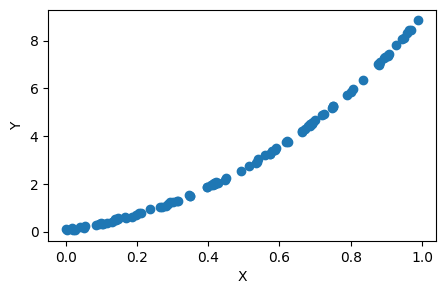

In [ ]:
# lets first generate a dataset of 100 points this time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.9*(X**5) - \
    1.1*(X**4) + \
    2.2*(X**3) + \
    4.6*(X**2) + \
    2.4* X + \
    0.1*np.random.rand(100,1)

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Bias-Variance Tradeoff

## Analogy of archery

<img src = "https://drive.google.com/uc?id=1tBphCwDoA5WnZVqShCRMDKudiW9eumBY">

<img src = "https://drive.google.com/uc?id=1dRX9WPCZV6uzuiKrV9UVAy_5vloDa4Yp">
<img src="https://drive.google.com/uc?id=1v_1OFxL3C-Gz6_6xhORecRuqvtLullpk">
<img src = "https://drive.google.com/uc?id=1LiS6lLozRGd3AcZ2xuqPlRYhTxjlEf1f">


So,  which model should we have ?

the model that is hitting mostly on target (bullseye)

- the model has low bias

And since model is having a steady aim (consistent in its predictions for aiming)

- the model has low variance

<img src="https://drive.google.com/uc?id=1LXj3wnMMuAvN-9RmHDY9zhhp1uNSqcTv">

# Realtion between Bias-Variance and Overfit-Underfit

<img src=" https://drive.google.com/uc?id=1VqnSbrWhjRSiNTA8hpNql0XMudg5z3id">

Do you expect bias and variance to be high or low for an under-fitted model?


Answer:
- Bias would be high because the model can't grasp the patterns, and predictions would be mostly inaccurate.
- Variance would be low because the model is simplistic, so predictions wouldn't fluctuate much with small changes in feature values.

What about bias and variance in an over-fitted model?

Answer:
- The bias will generally be low, which means the model can fit the training data well. However, predictions may still be bad for new, unseen data.
- The variance will be high because the model is overly complex, making predictions sensitive to even small changes in the input data.

# Regularization

what features are useful to have a good fit model?
<img src="https://drive.google.com/uc?id=1aShEpIFYmez8UT6pBMi7SnWQrQNAnQ0B">

to make  w1,w2≠0  and  w3,w4=0 ...we perform:
<img src="https://drive.google.com/uc?id=1vUQMxoyimhtu3og0q0mILCjSGJYFvpMV ">

### the new Loss function

<img src="https://drive.google.com/uc?id=1cicegpw44hMTi3_LSM97cxa_hYw34yAU">

#### How does $\lambda$ gives that sweet spot between MSE and Regularization term ?

Ans: a right value of $\lambda$  :

1. There is  freedom to MSE so that:
  - The **weights are  optimized** to reach the **lowest possible MSE value**
  - Which **does not lead to overfitting**

2. It also provide  freedom to Regularization term so that:
 - The regularization term can make the weights of the model close to 0
 - Which **does not lead to underfitting**

<br>

**Note:** The term Wj^2 is called as L2/Ridge Regularization


<img src="https://drive.google.com/uc?id=1hZfh-H1dCMdxxOrUbc83eNcE0sRSWfMs">




## L-1 Regularization

<img src="https://drive.google.com/uc?id=1QkAmJ30On7RrOPQvH4X299uOFeC_5l8D">


L1 Regularization (Lasso Regularization):


- Encourages sparsity in the model, leading some coefficients to become exactly zero.
- Effectively eliminates less important features from the model.



## L-2 Regularization
<img src="https://drive.google.com/uc?id=1JxBlsF7lOVu9Z0HbzWn9PauP1R4z-k4J">



L2 Regularization (Ridge Regularization):


- Doesn't encourage sparsity but instead reduces the magnitude of all coefficients.
- Useful when you want to keep all features but control their impact on the model.
- Can handle multicollinearity by shrinking correlated coefficients towards each other.
<img src="https://drive.google.com/uc?id=1VMQG-0d6cFGdISzugjBlof_VdGKdnwpT">

## Regularization Code

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = datasets.load_diabetes() #dataset

X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
degree = 10



In [ ]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [ ]:
y[0]

151.0

In [ ]:
X_train = X_train[:150]
y_train = y_train[:150]

In [ ]:
poly = PolynomialFeatures(degree=degree)



In [ ]:
X_train_poly = poly.fit_transform(X_train)


In [ ]:
X_train_poly[0].size


184756

In [ ]:
X_test_poly = poly.transform(X_test)

In [ ]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)

output = model.predict(X_test_poly_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error

print('MSE test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE train:', mean_squared_error(y_train, output))

MSE test: 90070.9950112891
MSE train: 2.362040223171574e-23


In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
_model_lasso = Lasso(alpha=0.01)  # Alpha is the regularization strength
_model_ridge = Ridge(alpha=1.0)    # Alpha is the regularization strength

In [ ]:
# Fit the models to the training data
_model_lasso.fit(X_train_poly_scaled, y_train)
_model_ridge.fit(X_train_poly_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.508e+03, tolerance: 9.001e+01
  model = cd_fast.enet_coordinate_descent(


Ridge()

In [ ]:
lasso_predictions = _model_lasso.predict(X_test_poly_scaled)
ridge_predictions = _model_ridge.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

test MSE for L1: 17553.80493667668
test MSE for L2: 76787.68109743259
